In [1]:
#setting up libraries
%matplotlib inline
import matplotlib.pyplot as plt
#dataset: askmefi_category_year.tsv
import pandas as pd
import matplotlib.ticker as mticker
from datascience import *
import numpy as np
from itertools import groupby


In [2]:
rank = Table.read_table('salaries-by-college-type-CLEAN.csv')
#rank.group('School Name')
rank.column('School Type')

array(['Engineering', 'Engineering', 'Engineering', 'Engineering',
       'Engineering', 'Engineering', 'Engineering', 'Engineering',
       'Engineering', 'Engineering', 'Engineering', 'Engineering',
       'Engineering', 'Engineering', 'Engineering', 'Engineering',
       'Engineering', 'Engineering', 'Engineering', 'Party', 'Party',
       'Party', 'Party', 'Party', 'Party', 'Party', 'Party', 'Party',
       'Party', 'Party', 'Party', 'Party', 'Party', 'Party', 'Party',
       'Party', 'Party', 'Party', 'Party', 'Liberal Arts', 'Liberal Arts',
       'Liberal Arts', 'Liberal Arts', 'Liberal Arts', 'Liberal Arts',
       'Liberal Arts', 'Liberal Arts', 'Liberal Arts', 'Liberal Arts',
       'Liberal Arts', 'Liberal Arts', 'Liberal Arts', 'Liberal Arts',
       'Liberal Arts', 'Liberal Arts', 'Liberal Arts', 'Liberal Arts',
       'Liberal Arts', 'Liberal Arts', 'Liberal Arts', 'Liberal Arts',
       'Liberal Arts', 'Liberal Arts', 'Liberal Arts', 'Liberal Arts',
       'Liberal Arts'

In [3]:
rank

School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary
Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$99,200.00","$168,000.00"
California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00","$104,000.00","$161,000.00"
Harvey Mudd College,Engineering,"$71,800.00","$122,000.00","$96,000.00","$180,000.00"
"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$94,300.00","$143,000.00"
Cooper Union,Engineering,"$62,200.00","$114,000.00","$80,200.00","$142,000.00"
Worcester Polytechnic Institute (WPI),Engineering,"$61,000.00","$114,000.00","$91,200.00","$137,000.00"
Carnegie Mellon University (CMU),Engineering,"$61,800.00","$111,000.00","$80,100.00","$150,000.00"
Rensselaer Polytechnic Institute (RPI),Engineering,"$61,100.00","$110,000.00","$85,500.00","$140,000.00"
Georgia Institute of Technology,Engineering,"$58,300.00","$106,000.00","$85,200.00","$137,000.00"
Colorado School of Mines,Engineering,"$58,100.00","$106,000.00","$87,900.00","$142,000.00"


In [4]:
averages = pd.read_csv('salaries-by-college-type-CLEAN.csv', delimiter=',')

In [5]:
# Dropping the 25th and 75th percentile salary since it will not be needed in this project
new_averages = averages.drop(['Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary'], axis=1)
new_averages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 4 columns):
School Name                 269 non-null object
School Type                 269 non-null object
Starting Median Salary      269 non-null object
Mid-Career Median Salary    269 non-null object
dtypes: object(4)
memory usage: 8.5+ KB


In [6]:
#converting currency data into float and string values to be used for data manipulation
string_col = new_averages[new_averages.columns[0:2]].astype(str)
salary_col = new_averages[new_averages.columns[2:]].replace('[\$,]', '', regex=True).astype(float)

In [7]:
#checking information regarding the column data types
string_col.info()
salary_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 2 columns):
School Name    269 non-null object
School Type    269 non-null object
dtypes: object(2)
memory usage: 4.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 2 columns):
Starting Median Salary      269 non-null float64
Mid-Career Median Salary    269 non-null float64
dtypes: float64(2)
memory usage: 4.3 KB


In [8]:
#placing the new column data types into the data set
result = pd.concat([string_col, salary_col], axis=1, sort=False)

In [9]:
result

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0
2,Harvey Mudd College,Engineering,71800.0,122000.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0
4,Cooper Union,Engineering,62200.0,114000.0
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0
6,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0
8,Georgia Institute of Technology,Engineering,58300.0,106000.0
9,Colorado School of Mines,Engineering,58100.0,106000.0


In [10]:
#Creating a  new column wich shows if a school is a party school or not, then takes means of both
#Also removing the school type 'party' to state since they are state schools, since want to compare these results seperately
party_school = 'No'
result['Party School'] = party_school
result['Party School'][result['School Type'].str.contains('Party')] = 'Yes'
result['School Type'][result['School Type'].str.contains('Party')] = 'State'

result

C:\Users\Z\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Z\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Party School
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,No
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,No
2,Harvey Mudd College,Engineering,71800.0,122000.0,No
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,No
4,Cooper Union,Engineering,62200.0,114000.0,No
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,No
6,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0,No
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,No
8,Georgia Institute of Technology,Engineering,58300.0,106000.0,No
9,Colorado School of Mines,Engineering,58100.0,106000.0,No


In [11]:
#Creates the mean of each school type as a starting salary
start_sal_mean = result.groupby('School Type')['Starting Median Salary'].mean()
combo_starting_school_type_table = pd.concat([start_sal_mean], axis=1)
combo_starting_school_type_table

,Starting Median Salary
School Type,
Engineering,59057.894737
Ivy League,60475.000000
Liberal Arts,45746.808511
State,44289.230769


In [12]:
#Creates the mean of each school type as a mid career
mid_sal_mean = result.groupby('School Type')['Mid-Career Median Salary'].mean()
combo_mid_school_type_table = pd.concat([mid_sal_mean], axis=1)
combo_mid_school_type_table

,Mid-Career Median Salary
School Type,
Engineering,103842.105263
Ivy League,120125.000000
Liberal Arts,89378.723404
State,79194.871795


In [13]:
#Creates the starting mean salary of schools that are either party schools or not
party_start_sal = result.groupby('Party School')['Starting Median Salary'].mean()
combo_party_start_sal_table = pd.concat([party_start_sal], axis=1)
combo_party_start_sal_table

,Starting Median Salary
Party School,
No,46096.787149
Yes,45715.000000


In [14]:
#Creates the mid-career mean salary of schools that are either party schools or not
party_mid_sal = result.groupby('Party School')['Mid-Career Median Salary'].mean()
combo_party_mid_sal_table = pd.concat([party_mid_sal], axis=1)
combo_party_mid_sal_table

,Mid-Career Median Salary
Party School,
No,83871.88755
Yes,84685.00000


In [15]:
#Creating a new column for a percent difference from starting salary to mid-career salary
percent_diff = (result['Starting Median Salary'] / result['Mid-Career Median Salary']) *100
result['Percent Difference'] = percent_diff
result

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Party School,Percent Difference
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,No,57.301587
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,No,61.382114
2,Harvey Mudd College,Engineering,71800.0,122000.0,No,58.852459
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,No,54.736842
4,Cooper Union,Engineering,62200.0,114000.0,No,54.561404
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,No,53.508772
6,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0,No,55.675676
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,No,55.545455
8,Georgia Institute of Technology,Engineering,58300.0,106000.0,No,55.000000
9,Colorado School of Mines,Engineering,58100.0,106000.0,No,54.811321


In [25]:
#creating a table for percent difference
avg_pct_diff = result.groupby('School Type')['Percent Difference'].mean()
avg_pct_diff

School Type
Engineering     56.970520
Ivy League      50.590321
Liberal Arts    51.600849
State           56.303099
Name: Percent Difference, dtype: float64

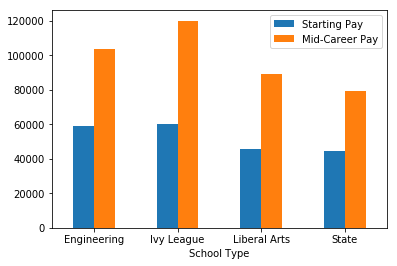

In [28]:
#Create a bar graoh to display the differences in starting and mid-career salary
plot_data = pd.DataFrame({'Starting Pay' : start_sal_mean, 'Mid-Career Pay' : mid_sal_mean})
ax.set_ylabel('Dollars')
ax = plot_data.plot.bar(rot=0)

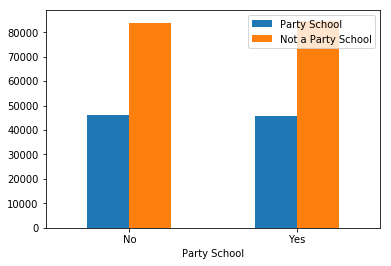

In [18]:
#creating a graph of party and non-party schools
plot_data = pd.DataFrame({'Party School' : party_start_sal, 'Not a Party School' : party_mid_sal})
ax = plot_data.plot.bar(rot=0)

Text(0.5,0,'Starting Median Salary')

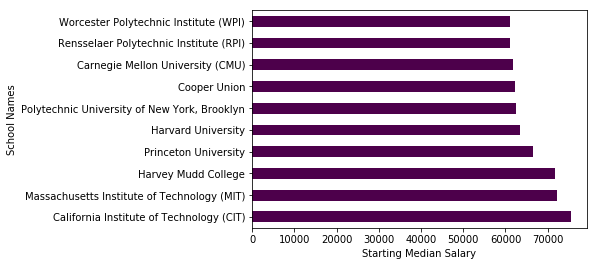

In [24]:
#Filter top 10 starting salary schools
#Show graoh of top ten school names
ten_highest_start_sal = result.nlargest(10, 'Starting Median Salary')
ten_highest_start_sal

school_name = ten_highest_start_sal['School Name'] 
salary = ten_highest_start_sal["Starting Median Salary"]

data_plot_data = pd.DataFrame({'School Name' : school_name, 'Starting Median Salary' : salary})
ax = data_plot_data.plot.barh(x='School Name', y='Starting Median Salary', legend=False, colormap = 'BuPu_r')
ax.set_ylabel('School Names')
ax.set_xlabel('Starting Median Salary')